In [76]:
import pandas as pd
import numpy as np
import cv2
import mediapipe as mp
import time

for i in range(9):

    mp_drawing = mp.solutions.drawing_utils
    hand = mp.solutions.hands
    mp_hands = mp.solutions.hands.Hands()

    cap = cv2.VideoCapture(f'{i+1}.mp4')
    pTime = 0

    all_landmarks = []

    while True:
        ret, image = cap.read()
        if not ret:
            break
        rows, cols, _ = image.shape
        
        image = cv2.cvtColor(cv2.flip(image, 1), cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        results = mp_hands.process(image)
        image.flags.writeable = True
        
        frame_landmarks = []
        
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                mp_drawing.draw_landmarks(image, hand_landmarks, hand.HAND_CONNECTIONS)

                for landmark in hand_landmarks.landmark :
                    x_landmark = int(landmark.x * cols) 
                    y_landmark = int(landmark.y * rows) 
                    frame_landmarks.append(y_landmark)

        if len(frame_landmarks) == 21:
            all_landmarks.append(frame_landmarks)
        
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        cTime = time.time()
        fps = 1 / (cTime - pTime)
        pTime = cTime
        cv2.putText(image, f'{fps:.0f}', (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1.2, (255, 0, 0), 3)

        cv2.imshow('MediaPipe Hands', image)
        if cv2.waitKey(10) & 0xFF == 27:
            break

    cap.release()
    cv2.destroyAllWindows()


    data = pd.DataFrame(all_landmarks)
    data['class'] = i+1
    data.to_csv(f'{i+1}.csv')


In [81]:
df = pd.DataFrame()
for i in range(9):
    data = pd.read_csv(f'{i+1}.csv')
    df = pd.concat([data, df], ignore_index=True)
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,12,13,14,15,16,17,18,19,20,class
0,0,492,533,557,577,596,504,480,495,509,...,484,435,411,436,454,408,389,412,431,9
1,1,500,537,569,601,632,504,479,497,510,...,488,434,414,442,456,408,391,416,431,9
2,2,504,541,571,603,633,504,480,502,514,...,489,434,415,447,460,408,392,420,433,9
3,3,502,539,570,601,630,504,482,502,512,...,490,435,414,446,461,410,391,420,436,9
4,4,501,537,569,602,634,503,482,502,512,...,488,434,415,446,457,408,391,418,431,9


In [82]:
df.shape

(3528, 23)

In [85]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,class
0,492,533,557,577,596,504,480,495,509,467,...,484,435,411,436,454,408,389,412,431,9
1,500,537,569,601,632,504,479,497,510,466,...,488,434,414,442,456,408,391,416,431,9
2,504,541,571,603,633,504,480,502,514,465,...,489,434,415,447,460,408,392,420,433,9
3,502,539,570,601,630,504,482,502,512,466,...,490,435,414,446,461,410,391,420,436,9
4,501,537,569,602,634,503,482,502,512,465,...,488,434,415,446,457,408,391,418,431,9


In [87]:
from sklearn.utils import shuffle
df=shuffle(df)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,class
3044,600,571,521,480,453,420,349,300,259,416,...,226,435,394,439,475,468,441,473,502,2
1,500,537,569,601,632,504,479,497,510,466,...,488,434,414,442,456,408,391,416,431,9
2778,647,632,590,555,529,495,429,385,347,485,...,315,498,463,509,541,522,503,537,561,2
499,560,535,490,457,448,393,322,277,237,387,...,198,405,370,424,462,436,419,458,486,8
218,275,306,333,355,381,263,214,236,262,221,...,240,187,146,180,210,163,128,155,182,9


In [88]:
df.isna().sum()

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
class    0
dtype: int64

In [91]:
df.duplicated().sum()

0

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3528 entries, 3044 to 1838
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       3528 non-null   int64
 1   1       3528 non-null   int64
 2   2       3528 non-null   int64
 3   3       3528 non-null   int64
 4   4       3528 non-null   int64
 5   5       3528 non-null   int64
 6   6       3528 non-null   int64
 7   7       3528 non-null   int64
 8   8       3528 non-null   int64
 9   9       3528 non-null   int64
 10  10      3528 non-null   int64
 11  11      3528 non-null   int64
 12  12      3528 non-null   int64
 13  13      3528 non-null   int64
 14  14      3528 non-null   int64
 15  15      3528 non-null   int64
 16  16      3528 non-null   int64
 17  17      3528 non-null   int64
 18  18      3528 non-null   int64
 19  19      3528 non-null   int64
 20  20      3528 non-null   int64
 21  class   3528 non-null   int64
dtypes: int64(22)
memory usage: 633.9 KB


In [90]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,class
count,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,...,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000
mean,616.051020,596.103741,552.180839,514.438209,493.151927,463.685091,398.146542,366.590986,339.146542,451.301587,...,342.614796,457.596372,405.461735,411.841553,411.907313,476.370181,437.693878,438.886054,437.886054,4.691610
std,77.638525,65.931777,55.066984,53.120516,57.384636,53.877201,55.944394,67.198530,83.521181,55.018158,...,109.096334,61.033489,61.769643,83.952662,113.486658,71.464185,75.740022,88.639665,106.214953,2.437217
min,256.000000,290.000000,317.000000,340.000000,361.000000,249.000000,195.000000,219.000000,187.000000,208.000000,...,147.000000,174.000000,131.000000,165.000000,174.000000,147.000000,114.000000,140.000000,166.000000,1.000000
25%,580.000000,560.000000,518.000000,478.000000,450.000000,427.000000,360.000000,317.000000,279.750000,414.000000,...,257.000000,422.000000,367.000000,349.000000,307.000000,442.000000,394.000000,378.000000,357.000000,3.000000
50%,624.000000,599.000000,552.000000,515.000000,493.000000,462.500000,398.000000,363.000000,325.000000,451.000000,...,313.000000,459.000000,405.000000,414.000000,435.500000,481.000000,443.000000,444.000000,441.000000,4.000000
75%,668.000000,639.250000,588.000000,550.000000,530.000000,500.000000,440.000000,407.250000,377.250000,487.000000,...,436.000000,499.000000,441.000000,473.000000,509.000000,523.250000,487.000000,503.000000,524.000000,6.000000
max,811.000000,798.000000,771.000000,747.000000,730.000000,680.000000,604.000000,572.000000,595.000000,671.000000,...,624.000000,682.000000,595.000000,615.000000,629.000000,706.000000,650.000000,644.000000,650.000000,9.000000


In [93]:
df.corr()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,class
0,1.000000,0.983031,0.887564,0.696633,0.495587,0.800405,0.623786,0.265831,0.042895,0.871997,...,-0.099777,0.938601,0.764005,0.301363,0.059021,0.967118,0.890900,0.688997,0.525612,-0.383184
1,0.983031,1.000000,0.953379,0.799758,0.612921,0.888591,0.738329,0.397462,0.170252,0.935379,...,-0.047211,0.967884,0.791689,0.316012,0.069712,0.966127,0.879732,0.668203,0.502943,-0.343331
2,0.887564,0.953379,1.000000,0.937968,0.802318,0.970887,0.866832,0.568616,0.350219,0.979567,...,0.061797,0.959272,0.813861,0.353864,0.111416,0.910672,0.836039,0.640608,0.486650,-0.231660
3,0.696633,0.799758,0.937968,1.000000,0.956786,0.936476,0.870282,0.618813,0.424532,0.908957,...,0.083699,0.850333,0.749738,0.345566,0.127200,0.772799,0.740901,0.607282,0.490675,-0.060477
4,0.495587,0.612921,0.802318,0.956786,1.000000,0.814993,0.770561,0.560149,0.396539,0.765621,...,0.038988,0.692429,0.628351,0.295196,0.111903,0.609499,0.621056,0.553093,0.477033,0.107341
5,0.800405,0.888591,0.970887,0.936476,0.814993,1.000000,0.953858,0.724169,0.528959,0.981097,...,0.154569,0.920454,0.798238,0.361577,0.133082,0.835157,0.747851,0.532185,0.374016,-0.141546
6,0.623786,0.738329,0.866832,0.870282,0.770561,0.953858,1.000000,0.894261,0.751818,0.905367,...,0.313478,0.796518,0.741503,0.395139,0.206100,0.666525,0.573391,0.349867,0.196135,0.003272
7,0.265831,0.397462,0.568616,0.618813,0.560149,0.724169,0.894261,1.000000,0.966820,0.641304,...,0.543038,0.478577,0.537844,0.385374,0.284627,0.303155,0.216378,0.022495,-0.096423,0.214485
8,0.042895,0.170252,0.350219,0.424532,0.396539,0.528959,0.751818,0.966820,1.000000,0.435784,...,0.629789,0.259131,0.383669,0.354433,0.310167,0.074890,0.004970,-0.151787,-0.240582,0.326040
9,0.871997,0.935379,0.979567,0.908957,0.765621,0.981097,0.905367,0.641304,0.435784,1.000000,...,0.162504,0.975605,0.879092,0.466379,0.233758,0.914505,0.846800,0.648648,0.489869,-0.194974


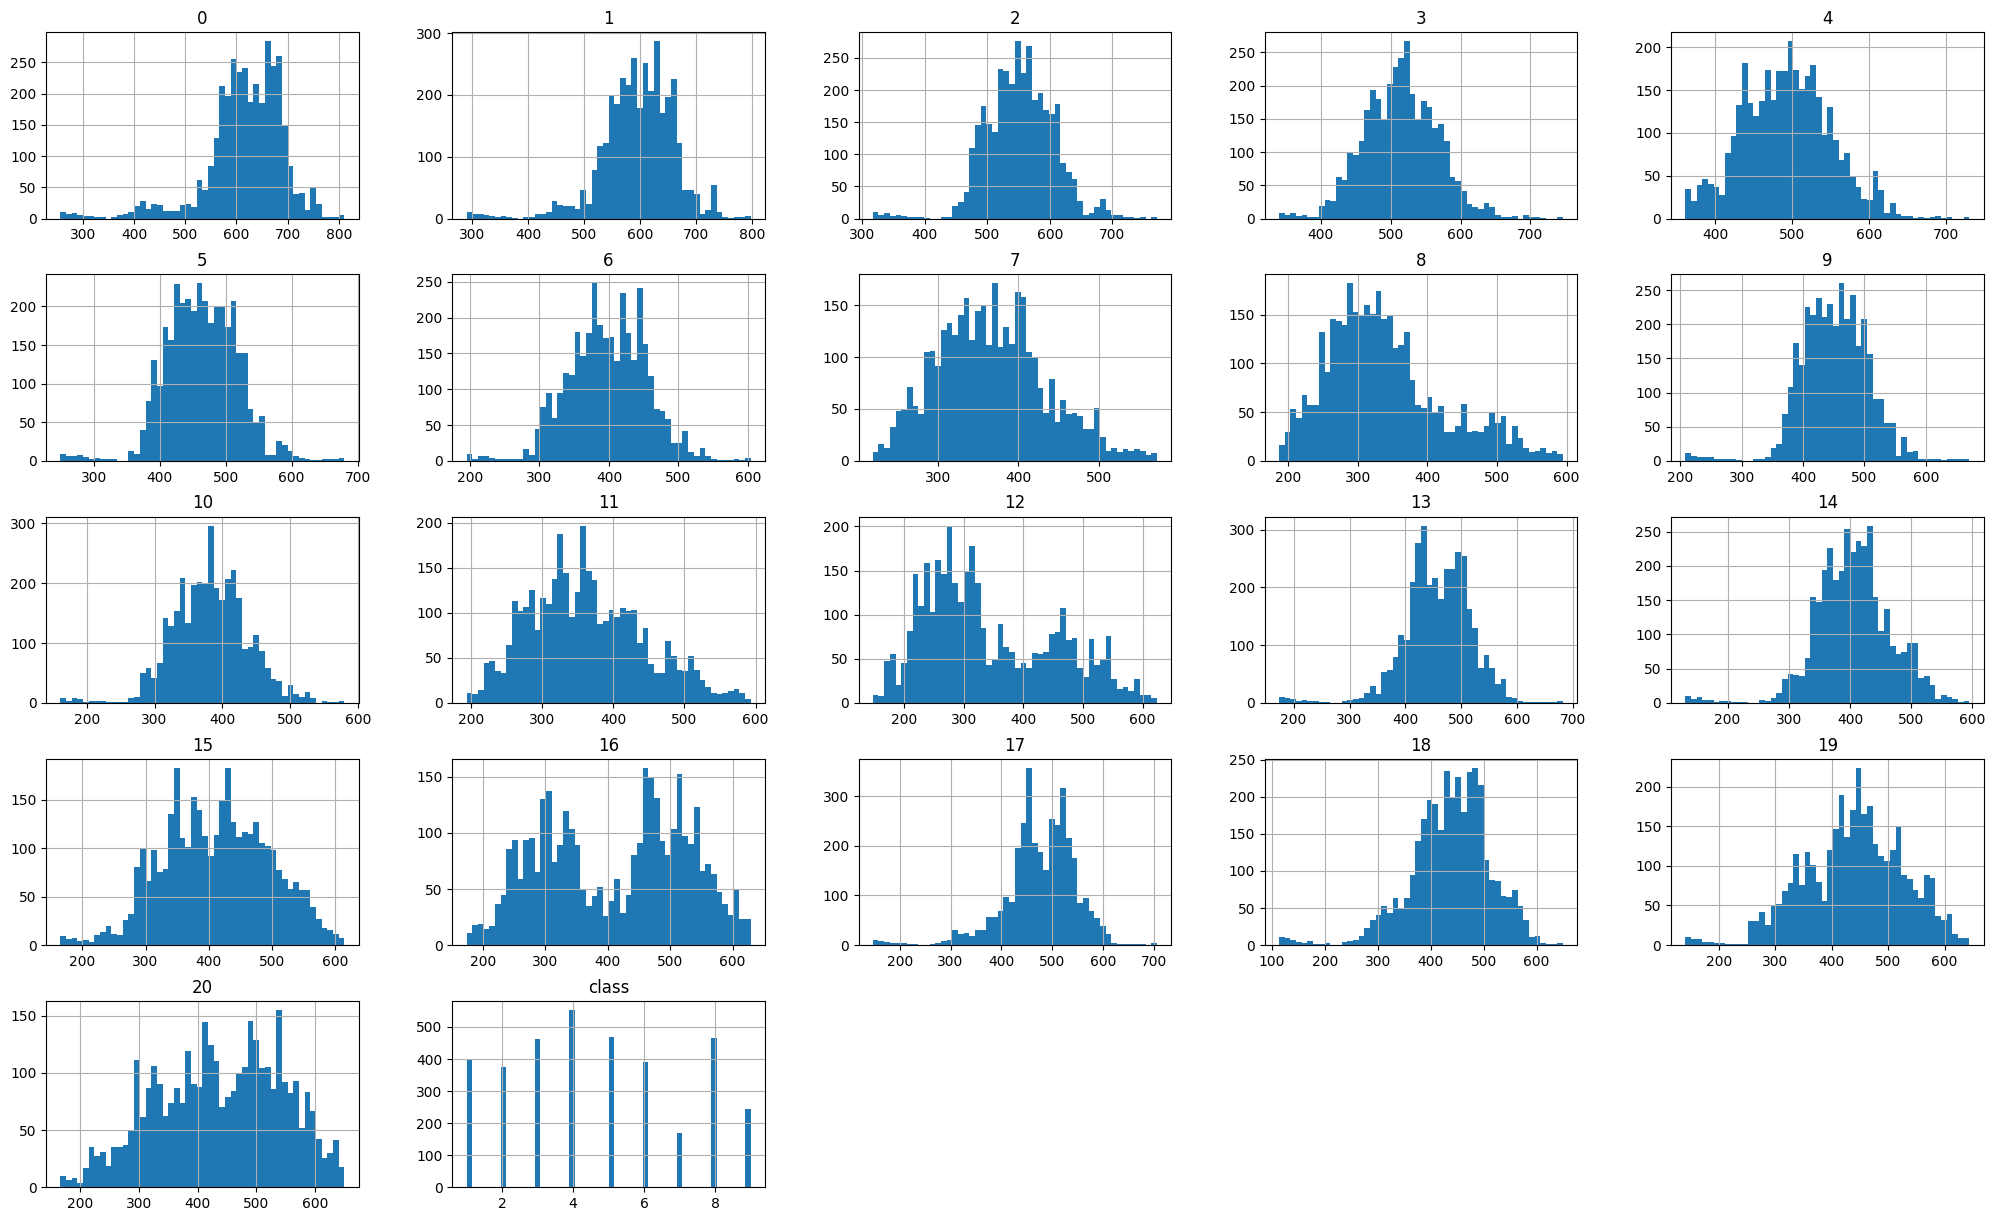

In [94]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(25,15))
plt.show()

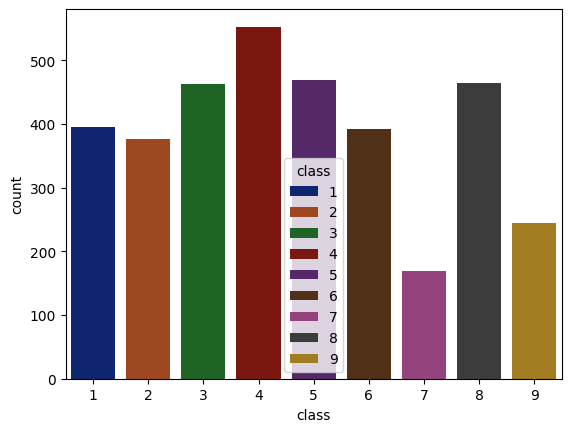

In [95]:
import seaborn as sns
sns.countplot(x = 'class', data = df, hue = 'class', palette = 'dark')
plt.show()

In [96]:
X = df.drop(columns=['class'])
y = df['class']

In [98]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
X=minmax.fit_transform(X)

In [111]:
import joblib
joblib.dump(minmax, 'minmax.joblib') 

['minmax.joblib']

In [99]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=42)

In [100]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2822, 21), (706, 21), (2822,), (706,))

In [103]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.svm import LinearSVC, SVC, NuSVC
from sklearn.linear_model import SGDClassifier, Perceptron, LogisticRegression, LogisticRegressionCV, PassiveAggressiveClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.semi_supervised import LabelPropagation, LabelSpreading
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.discriminant_analysis import  QuadraticDiscriminantAnalysis
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.linear_model import RidgeClassifier, RidgeClassifierCV
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier


# Dictionary of models
models = {
    'LinearSVC': LinearSVC(),
    'SGDClassifier': SGDClassifier(),
    'MLPClassifier': MLPClassifier(hidden_layer_sizes=(10,)),
    'Perceptron': Perceptron(),
    'LogisticRegression': LogisticRegression(),
    'LogisticRegressionCV': LogisticRegressionCV(),
    'SVC': SVC(),
    'PassiveAggressiveClassifier': PassiveAggressiveClassifier(),
    'LabelPropagation': LabelPropagation(),
    'LabelSpreading': LabelSpreading(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'QuadraticDiscriminantAnalysis': QuadraticDiscriminantAnalysis(),
    'HistGradientBoostingClassifier': HistGradientBoostingClassifier(),
    'RidgeClassifierCV': RidgeClassifierCV(),
    'RidgeClassifier': RidgeClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'BaggingClassifier': BaggingClassifier(),
    'BernoulliNB': BernoulliNB(),
    'GaussianNB': GaussianNB(),
    'NuSVC': NuSVC(),
    'KNeighborsClassifier' : KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'ExtraTreeClassifier': ExtraTreeClassifier(),
    'CheckingClassifier': DummyClassifier(strategy='constant', constant=1),
    'DummyClassifier': DummyClassifier(strategy='uniform')
}




from tqdm import tqdm
# Fit models, predict and calculate accuracy and F1 score
results = []
models_name = []
for name, model in tqdm(models.items()):
    try:
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        f1 = f1_score(y_test, predictions, average='weighted')
        precision = precision_score(y_test, predictions, average='weighted')
        recall = recall_score(y_test, predictions, average='weighted')
        models_name.append(name)
        results.append([accuracy, precision, recall, f1])
    except ValueError as e:
        print(f"Error in model {name}: {e}")

  7%|▋         | 2/27 [00:00<00:01, 16.57it/s]C:\Users\desoky\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
 15%|█▍        | 4/27 [00:01<00:08,  2.66it/s]C:\Users\desoky\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

Error in model NuSVC: specified nu is infeasible


 85%|████████▌ | 23/27 [00:22<00:02,  1.86it/s]C:\Users\desoky\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
100%|██████████| 27/27 [00:22<00:00,  1.22it/s]


In [104]:
import pandas as pd
Model_accuracy = pd.DataFrame(results,index=models_name,columns = ['Accuracy','Precision','Recall','F1 Score'])

In [105]:
Model_accuracy

,Accuracy,Precision,Recall,F1 Score
LinearSVC,0.947592,0.953187,0.947592,0.946695
SGDClassifier,0.941926,0.950598,0.941926,0.940660
MLPClassifier,0.866856,0.880373,0.866856,0.863372
Perceptron,0.835694,0.925111,0.835694,0.836044
LogisticRegression,0.890935,0.901224,0.890935,0.888488
LogisticRegressionCV,0.998584,0.998599,0.998584,0.998584
SVC,0.995751,0.995888,0.995751,0.995747
PassiveAggressiveClassifier,0.934844,0.950893,0.934844,0.931294
LabelPropagation,0.875354,0.877641,0.875354,0.874465
LabelSpreading,0.866856,0.869645,0.866856,0.865660


In [ ]:
max_indices = Model_accuracy.idxmax()
L = list(Model_accuracy.loc[max_indices[0]])
print(f"Model is {max_indices[0]}\nAccuracy:  {L[0]:.2f},\nPrecision: {L[1]:.2f}, \nRecall:    {L[2]:.2f}, \nF1 Score:  {L[3]:.2f}")

Model is QuadraticDiscriminantAnalysis
Accuracy:  1.00,
Precision: 1.00, 
Recall:    1.00, 
F1 Score:  1.00


C:\Users\desoky\AppData\Local\Temp\ipykernel_8064\3310572936.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  L=list(Model_accuracy.loc[max_indices[0]])
C:\Users\desoky\AppData\Local\Temp\ipykernel_8064\3310572936.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Model is {max_indices[0]}\nAccuracy:  {L[0]:.2f},\nPrecision: {L[1]:.2f}, \nRecall:    {L[2]:.2f}, \nF1 Score:  {L[3]:.2f}")


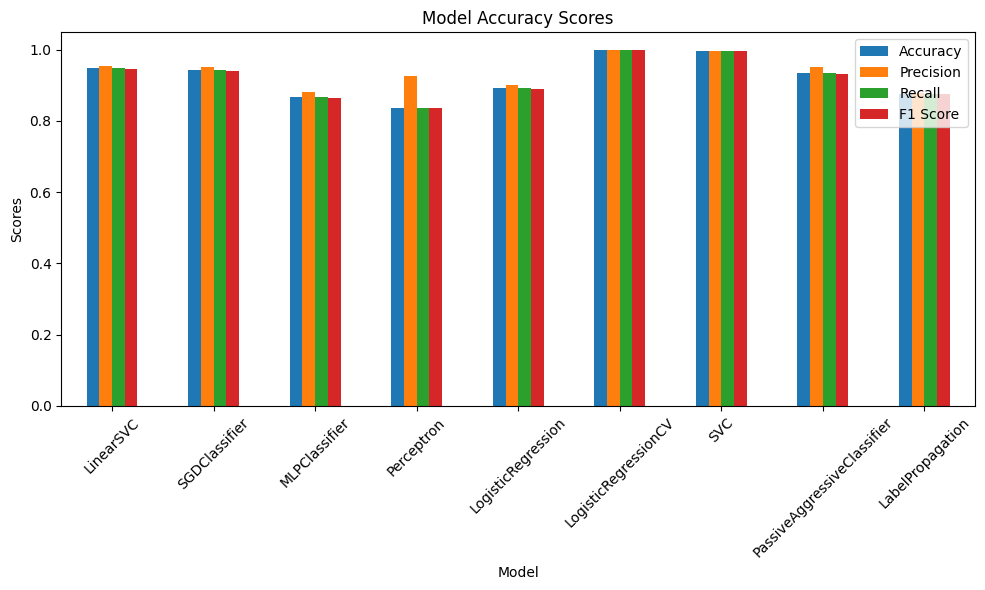

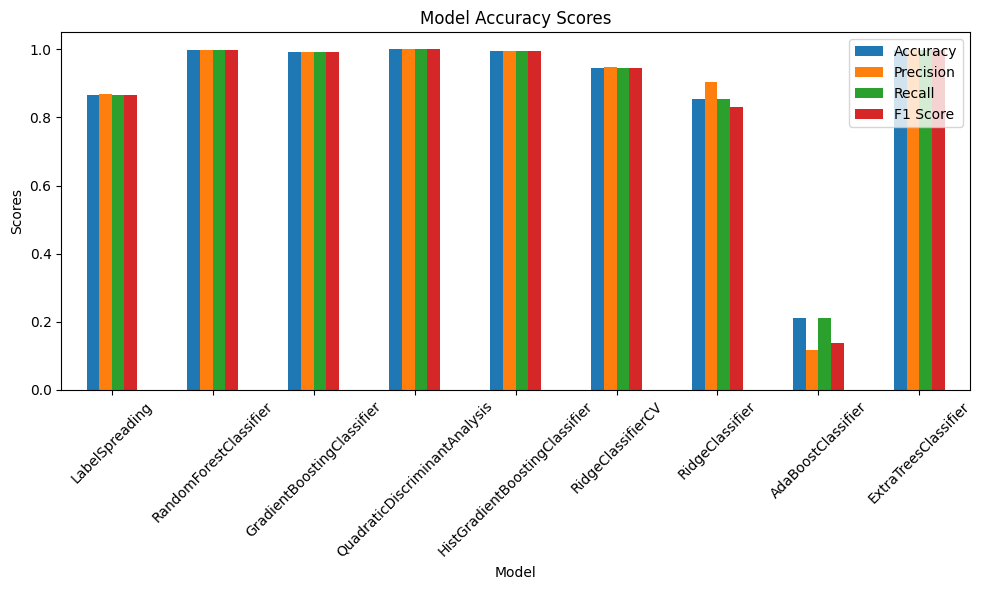

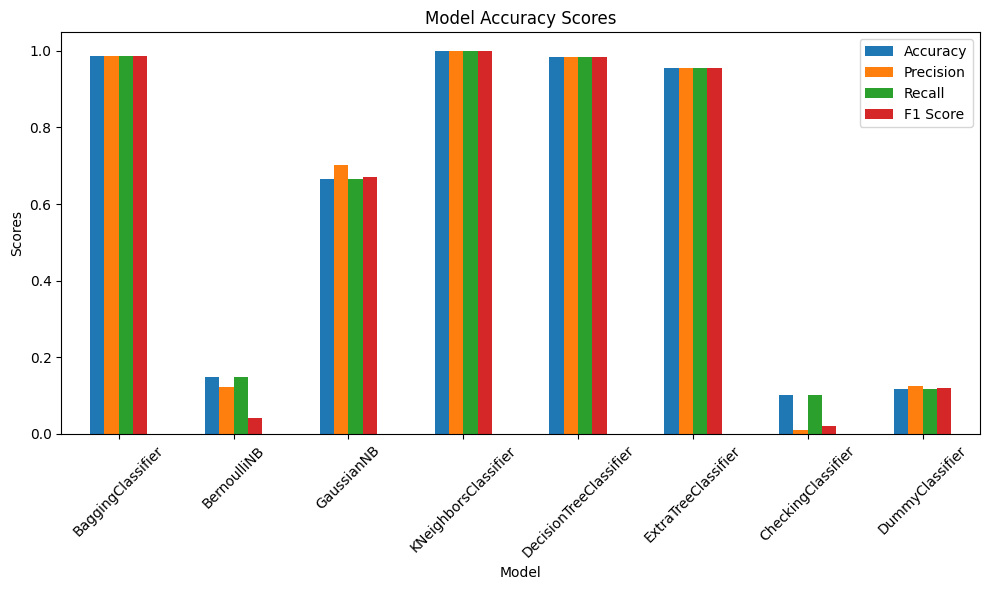

In [107]:
# Plotting
import matplotlib.pyplot as plt
Model_accuracy.iloc[:9,].plot(kind='bar', figsize=(10, 6))

# Customizing the plot

plt.xlabel('Model')
plt.ylabel('Scores')
plt.title('Model Accuracy Scores')
plt.xticks(rotation=45)  # Rotate model names for better readability
plt.legend(loc='upper right')
plt.tight_layout()  # Adjust layout to fit labels

# Display the plot
plt.show()
print("""

""")
# Plotting

Model_accuracy.iloc[9:18,].plot(kind='bar', figsize=(10, 6))

# Customizing the plot
plt.title('Model Accuracy Scores')
plt.xlabel('Model')
plt.ylabel('Scores')
plt.xticks(rotation=45)  # Rotate model names for better readability
plt.legend(loc='upper right')
plt.tight_layout()  # Adjust layout to fit labels
# Display the plot
plt.show()
print("""

""")

# Plotting

Model_accuracy.iloc[18:,].plot(kind='bar', figsize=(10, 6))

# Customizing the plot
plt.title('Model Accuracy Scores')
plt.xlabel('Model')
plt.ylabel('Scores')
plt.xticks(rotation=45)  # Rotate model names for better readability
plt.legend(loc='upper right')
plt.tight_layout()  # Adjust layout to fit labels

# Display the plot
plt.show()

In [118]:
import joblib
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)

joblib.dump(qda_model, 'qda_model.pkl')


['qda_model.pkl']

In [119]:
loaded_qda_model = joblib.load('qda_model.pkl')

In [121]:
from sklearn.metrics import accuracy_score
predictions = loaded_qda_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of the loaded model: {accuracy:.4f}")

Accuracy of the loaded model: 1.0000
